# Predicting House Prices / Multivariable Linear Regression / Boston Dataset

<img src="Public_Garden_KyleKlein_DJI_0970_HDR_1__db05f298-828d-485b-b924-458df444f996.png" alt="knn symbolic" title="title" width=800/>

- How much would a house cost in Boston?
- What features are important when predicting house prices in Boston?

## Notebook Imports

In [63]:
import pandas as pd
import numpy as np

# imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# statsmodel imports
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

boston= load_boston()

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

## Data Exploration

In [2]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
# actual prices in thousands
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Identifying the shape

In [7]:
boston.data.shape

(506, 13)

## Pandas DF

In [8]:
# creating Pandas DF
data = pd.DataFrame(data = boston.data, columns=boston.feature_names)

# adding target column to DF

data['PRICE'] = boston.target

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data Cleaning

In [10]:
# dict to rename columns
names = {'CRIM':'crime', 'ZN':'zoned', 'INDUS':'indus', 'CHAS':'charles_dummy', 'NOX':'no2',
         'RM':'rooms', 'AGE':'age', 'DIS':'work_dist', 'RAD':'highway_index', 'TAX':'tax',
         'PTRATIO':'stu_teach_ratio', 'B':'B', 'LSTAT':'lower_pop', 'PRICE':'price'}

data.rename(columns=names, inplace=True)

In [11]:
# no na values within this dataset
data.isna().sum()

crime              0
zoned              0
indus              0
charles_dummy      0
no2                0
rooms              0
age                0
work_dist          0
highway_index      0
tax                0
stu_teach_ratio    0
B                  0
lower_pop          0
price              0
dtype: int64

In [12]:
# no null values
data.isnull().any()

crime              False
zoned              False
indus              False
charles_dummy      False
no2                False
rooms              False
age                False
work_dist          False
highway_index      False
tax                False
stu_teach_ratio    False
B                  False
lower_pop          False
price              False
dtype: bool

## Data Visualization

- Looking for distribution of data and outliers
- Histograms, distributions and barcharts

### House Prices

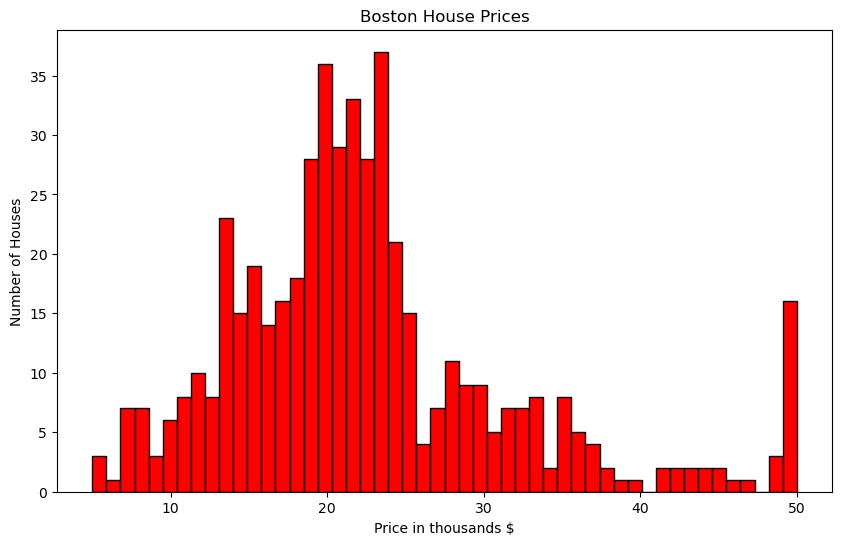

In [13]:
plt.figure(figsize=(10,6))
plt.hist(data['price'], bins=50, ec='black', color='red')
plt.title('Boston House Prices')
plt.xlabel('Price in thousands $')
plt.ylabel('Number of Houses')
plt.show()

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


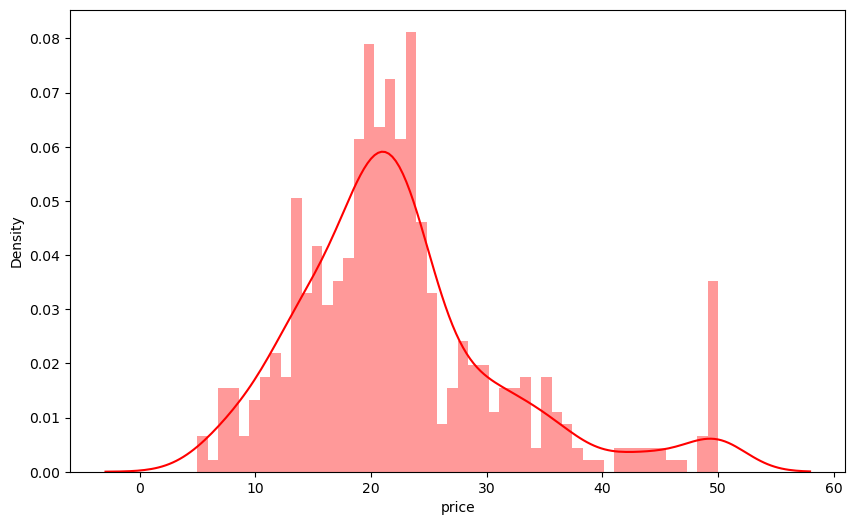

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data['price'], bins=50, color='red')
plt.show()
# with probability density function 

### Rooms

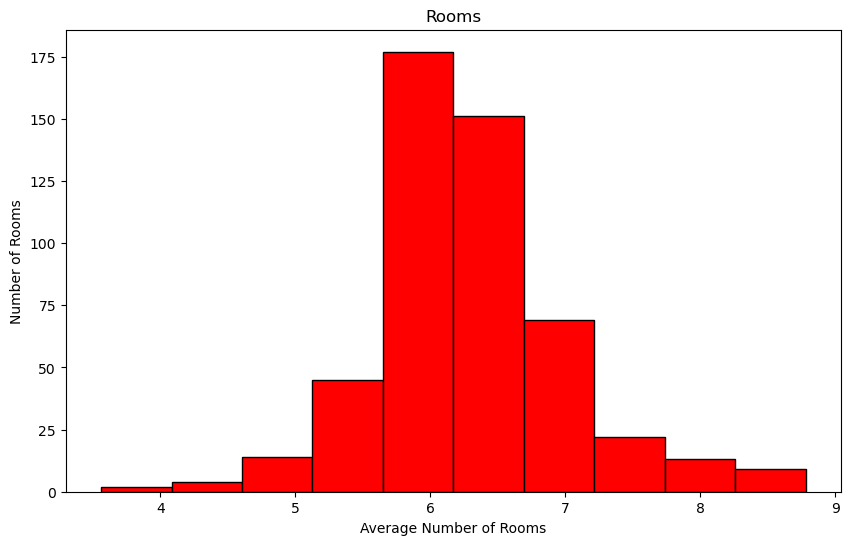

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['rooms'], ec='black', color='red')
plt.title('Rooms')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Rooms')
plt.show()

### Distance From Highways Index 

In [16]:
frequency = data['highway_index'].value_counts()

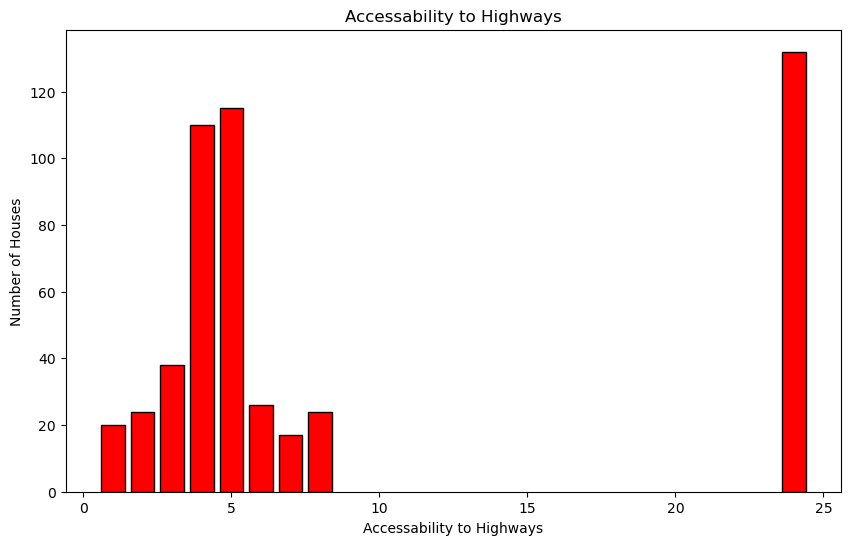

In [17]:
plt.figure(figsize=(10,6))
plt.bar(frequency.index, height=frequency, color='red', ec='black')
plt.title('Accessability to Highways')
plt.xlabel('Accessability to Highways')
plt.ylabel('Number of Houses')
plt.show()

## Descriptive Statistics

### House Prices

In [18]:
print('The mean house price in Boston is ', data['price'].mean(), ' in thousands.')
print('The median house price in Boston is ', data['price'].median(), ' in thousands.')
print('The median house price in Boston is ', data['price'].min(), ' in thousands.')
print('The median house price in Boston is ', data['price'].max(), ' in thousands.')

The mean house price in Boston is  22.532806324110698  in thousands.
The median house price in Boston is  21.2  in thousands.
The median house price in Boston is  5.0  in thousands.
The median house price in Boston is  50.0  in thousands.


### The rest of the features

In [19]:
data.describe()

crime       zoned       indus  charles_dummy         no2  \
count  506.000000  506.000000  506.000000     506.000000  506.000000   
mean     3.613524   11.363636   11.136779       0.069170    0.554695   
std      8.601545   23.322453    6.860353       0.253994    0.115878   
min      0.006320    0.000000    0.460000       0.000000    0.385000   
25%      0.082045    0.000000    5.190000       0.000000    0.449000   
50%      0.256510    0.000000    9.690000       0.000000    0.538000   
75%      3.677083   12.500000   18.100000       0.000000    0.624000   
max     88.976200  100.000000   27.740000       1.000000    0.871000   

            rooms         age   work_dist  highway_index         tax  \
count  506.000000  506.000000  506.000000     506.000000  506.000000   
mean     6.284634   68.574901    3.795043       9.549407  408.237154   
std      0.702617   28.148861    2.105710       8.707259  168.537116   
min      3.561000    2.900000    1.129600       1.000000  187.000000   
25%      5.885500   45.025000    2.100175       4.000000  279.000000   
50%      6.208500   77.500000    3.207450       5.000000  330.000000   
75%      6.623500   94.075000    5.188425      24.000000  666.000000   
max      8.780000  100.000000   12.126500      24.000000  711.000000   

       stu_teach_ratio           B   lower_pop       price  
count       506.000000  506.000000  506.000000  506.000000  
mean         18.455534  356.674032   12.653063   22.532806  
std           2.164946   91.294864    7.141062    9.197104  
min          12.600000    0.320000    1.730000    5.000000  
25%          17.400000  375.377500    6.950000   17.025000  
50%          19.050000  391.440000   11.360000   21.200000  
75%          20.200000  396.225000   16.955000   25.000000  
max          22.000000  396.900000   37.970000   50.000000

In [20]:
data.mean()

crime                3.613524
zoned               11.363636
indus               11.136779
charles_dummy        0.069170
no2                  0.554695
rooms                6.284634
age                 68.574901
work_dist            3.795043
highway_index        9.549407
tax                408.237154
stu_teach_ratio     18.455534
B                  356.674032
lower_pop           12.653063
price               22.532806
dtype: float64

In [21]:
data.median()

crime                0.25651
zoned                0.00000
indus                9.69000
charles_dummy        0.00000
no2                  0.53800
rooms                6.20850
age                 77.50000
work_dist            3.20745
highway_index        5.00000
tax                330.00000
stu_teach_ratio     19.05000
B                  391.44000
lower_pop           11.36000
price               21.20000
dtype: float64

In [22]:
data.min()

crime                0.00632
zoned                0.00000
indus                0.46000
charles_dummy        0.00000
no2                  0.38500
rooms                3.56100
age                  2.90000
work_dist            1.12960
highway_index        1.00000
tax                187.00000
stu_teach_ratio     12.60000
B                    0.32000
lower_pop            1.73000
price                5.00000
dtype: float64

In [23]:
data.max()

crime               88.9762
zoned              100.0000
indus               27.7400
charles_dummy        1.0000
no2                  0.8710
rooms                8.7800
age                100.0000
work_dist           12.1265
highway_index       24.0000
tax                711.0000
stu_teach_ratio     22.0000
B                  396.9000
lower_pop           37.9700
price               50.0000
dtype: float64

##  Correlation 

## $$  \rho _{XY} = corr(X,Y) $$

## $$  -1.0 \leq \rho _{XY} \leq +1.0 $$

In [24]:
data.corr(method='pearson')

crime     zoned     indus  charles_dummy       no2  \
crime            1.000000 -0.200469  0.406583      -0.055892  0.420972   
zoned           -0.200469  1.000000 -0.533828      -0.042697 -0.516604   
indus            0.406583 -0.533828  1.000000       0.062938  0.763651   
charles_dummy   -0.055892 -0.042697  0.062938       1.000000  0.091203   
no2              0.420972 -0.516604  0.763651       0.091203  1.000000   
rooms           -0.219247  0.311991 -0.391676       0.091251 -0.302188   
age              0.352734 -0.569537  0.644779       0.086518  0.731470   
work_dist       -0.379670  0.664408 -0.708027      -0.099176 -0.769230   
highway_index    0.625505 -0.311948  0.595129      -0.007368  0.611441   
tax              0.582764 -0.314563  0.720760      -0.035587  0.668023   
stu_teach_ratio  0.289946 -0.391679  0.383248      -0.121515  0.188933   
B               -0.385064  0.175520 -0.356977       0.048788 -0.380051   
lower_pop        0.455621 -0.412995  0.603800      -0.053929  0.590879   
price           -0.388305  0.360445 -0.483725       0.175260 -0.427321   

                    rooms       age  work_dist  highway_index       tax  \
crime           -0.219247  0.352734  -0.379670       0.625505  0.582764   
zoned            0.311991 -0.569537   0.664408      -0.311948 -0.314563   
indus           -0.391676  0.644779  -0.708027       0.595129  0.720760   
charles_dummy    0.091251  0.086518  -0.099176      -0.007368 -0.035587   
no2             -0.302188  0.731470  -0.769230       0.611441  0.668023   
rooms            1.000000 -0.240265   0.205246      -0.209847 -0.292048   
age             -0.240265  1.000000  -0.747881       0.456022  0.506456   
work_dist        0.205246 -0.747881   1.000000      -0.494588 -0.534432   
highway_index   -0.209847  0.456022  -0.494588       1.000000  0.910228   
tax             -0.292048  0.506456  -0.534432       0.910228  1.000000   
stu_teach_ratio -0.355501  0.261515  -0.232471       0.464741  0.460853   
B                0.128069 -0.273534   0.291512      -0.444413 -0.441808   
lower_pop       -0.613808  0.602339  -0.496996       0.488676  0.543993   
price            0.695360 -0.376955   0.249929      -0.381626 -0.468536   

                 stu_teach_ratio         B  lower_pop     price  
crime                   0.289946 -0.385064   0.455621 -0.388305  
zoned                  -0.391679  0.175520  -0.412995  0.360445  
indus                   0.383248 -0.356977   0.603800 -0.483725  
charles_dummy          -0.121515  0.048788  -0.053929  0.175260  
no2                     0.188933 -0.380051   0.590879 -0.427321  
rooms                  -0.355501  0.128069  -0.613808  0.695360  
age                     0.261515 -0.273534   0.602339 -0.376955  
work_dist              -0.232471  0.291512  -0.496996  0.249929  
highway_index           0.464741 -0.444413   0.488676 -0.381626  
tax                     0.460853 -0.441808   0.543993 -0.468536  
stu_teach_ratio         1.000000 -0.177383   0.374044 -0.507787  
B                      -0.177383  1.000000  -0.366087  0.333461  
lower_pop               0.374044 -0.366087   1.000000 -0.737663  
price                  -0.507787  0.333461  -0.737663  1.000000

### Features with highest Correlation
- correlation between number of rooms and price, positive ~ 0.70
- correlation between % lower status of the population and price, negative ~ 0.73 
- correlation between pupil-teacher ratio by town and price, negative ~ 0.51
- correlation between % lower status of the population and rooms, negative ~ 0.61

In [25]:
mask = np.zeros_like(data.corr(method='pearson'))
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

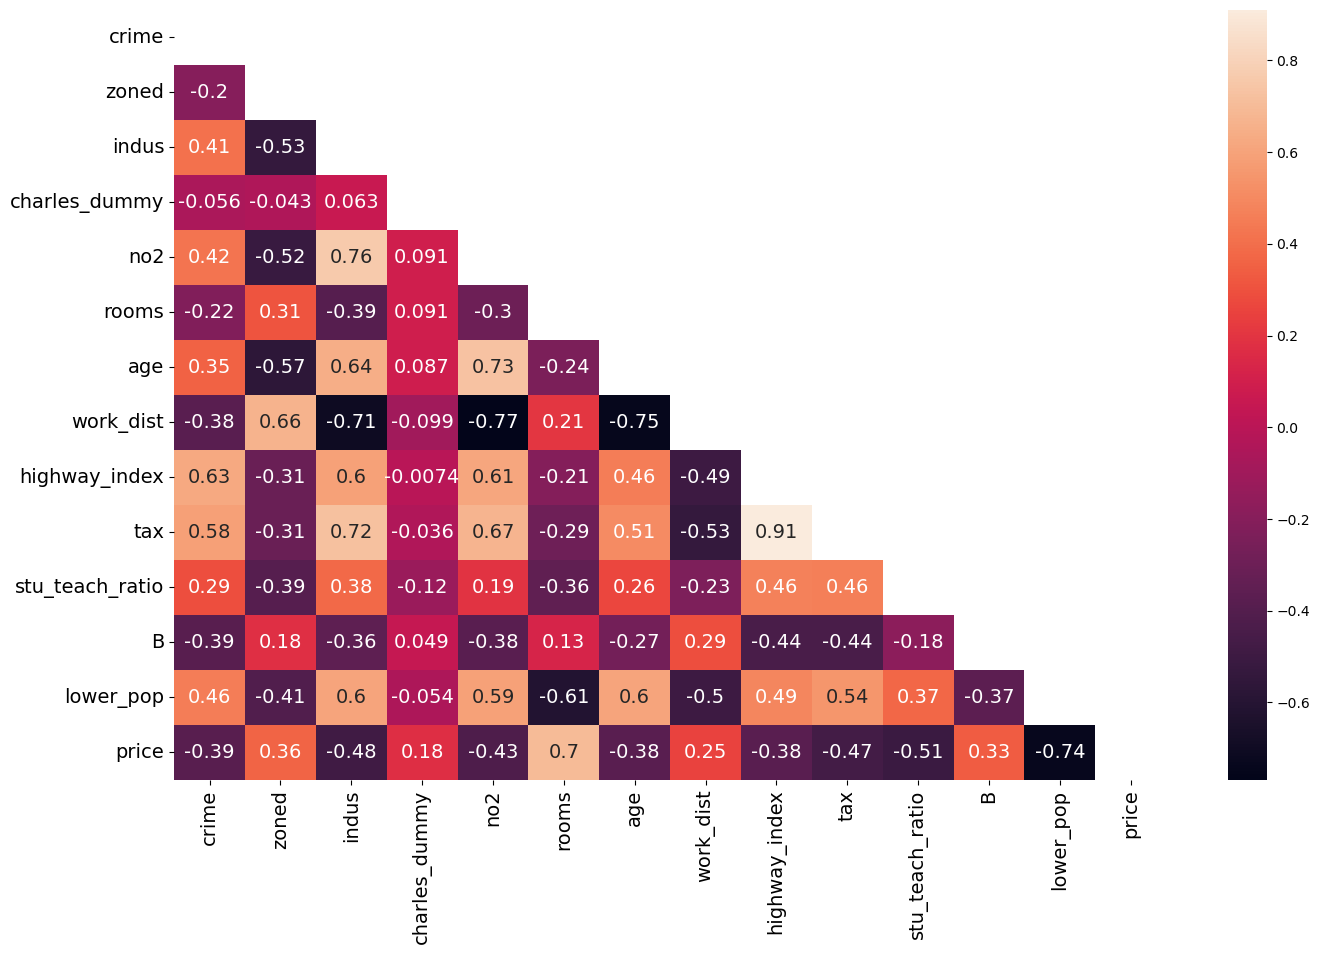

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Creating objects of the tables to be used in scatter plots to show relationships

In [27]:
nox = data['no2']
dist = data['work_dist']
house_prices = data['price']
lower_pop = data['lower_pop']
rooms = data['rooms']

Text(0.5, 1.0, 'Distance Vs NO2 Concentration: Correlation =  -0.769')

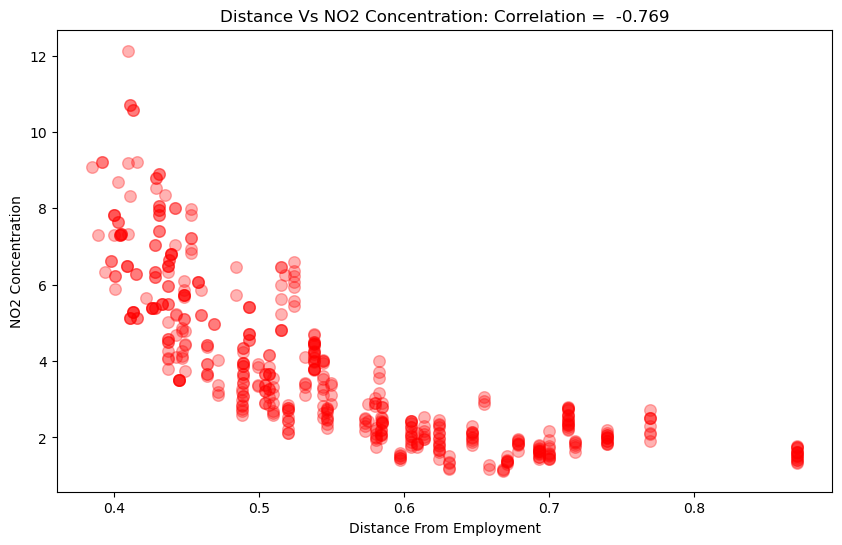

In [28]:
nox_dis_corr = round(nox.corr(dist),3)

plt.figure(figsize=(10,6))
plt.scatter(nox, dist, alpha=0.3, s=70, color='red')
plt.xlabel('Distance From Employment')
plt.ylabel('NO2 Concentration')
plt.title(f'Distance Vs NO2 Concentration: Correlation =  {nox_dis_corr}')

<Figure size 1000x600 with 0 Axes>

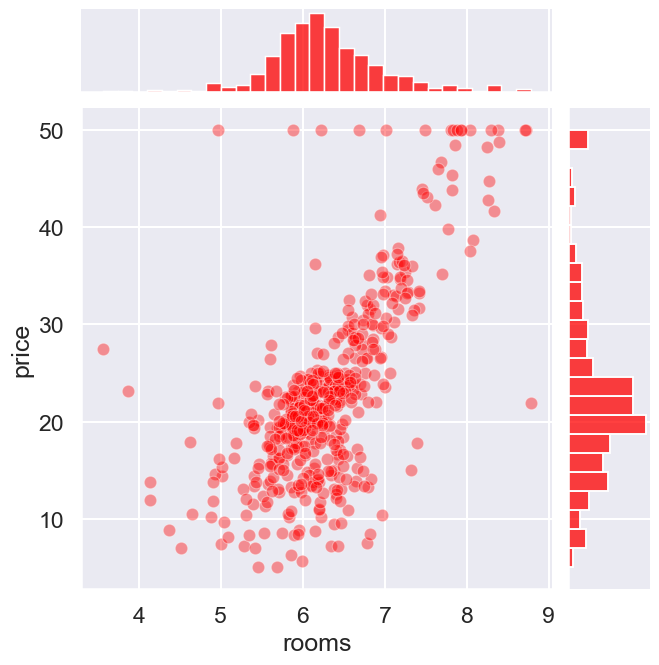

In [29]:
plt.figure(figsize=(10,6))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(x=rooms, y=data['price'], height=7, color='red', joint_kws={'alpha':0.4})

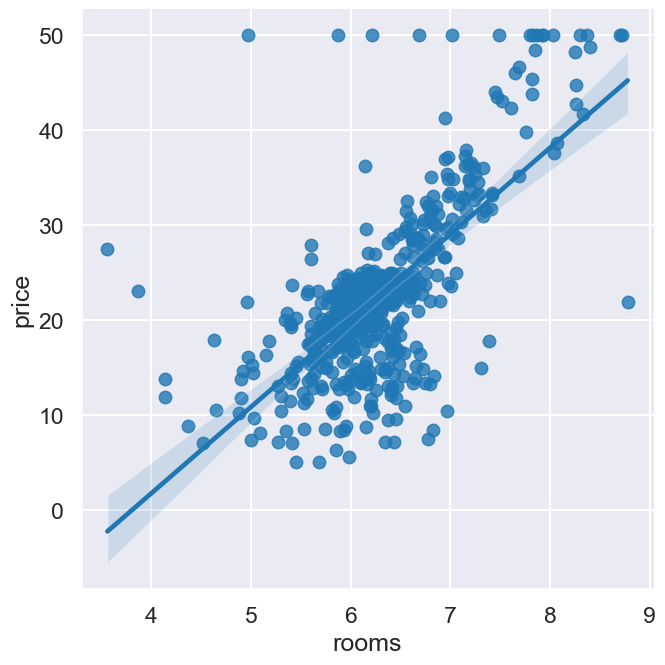

In [30]:
sns.lmplot(x = 'rooms', y = 'price', data=data, height=7)

The graph above shows a positive correlation between price and rooms, for this dataset, there appears to be a ceiling on price. Outliers appear to not skew regression line.

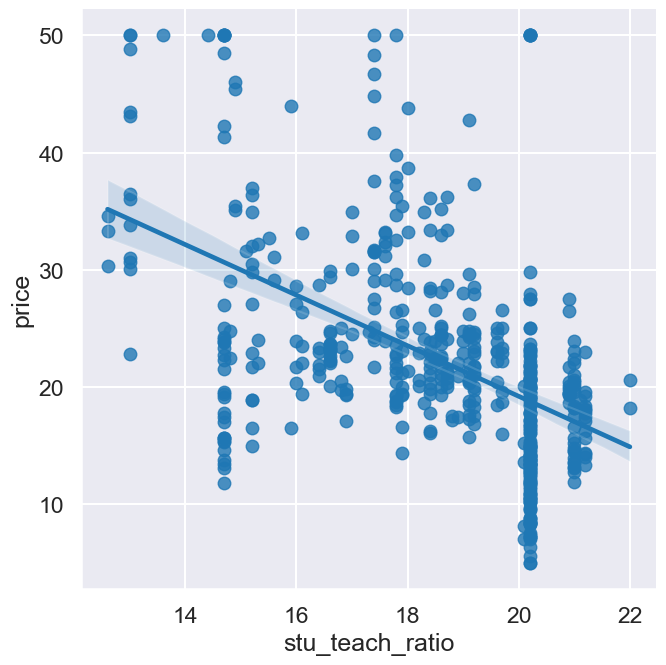

In [31]:
sns.lmplot(x = 'stu_teach_ratio', y = 'price', data=data, height=7)

The graph above shows the negative correlation between student-teacher ratio and house prices.

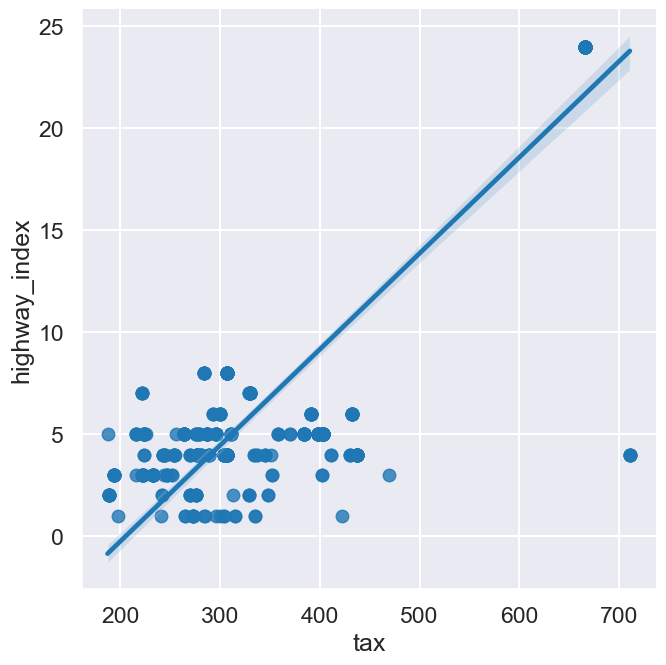

In [32]:
sns.lmplot(x = 'tax', y = 'highway_index', data=data, height=7)

correlation between highway distance index and tax had the highest correlation, but graph shows that it the outliers skew the regression line. This is because highway_index is a discrete variable.

CPU times: user 9.19 s, sys: 188 ms, total: 9.38 s
Wall time: 9.06 s


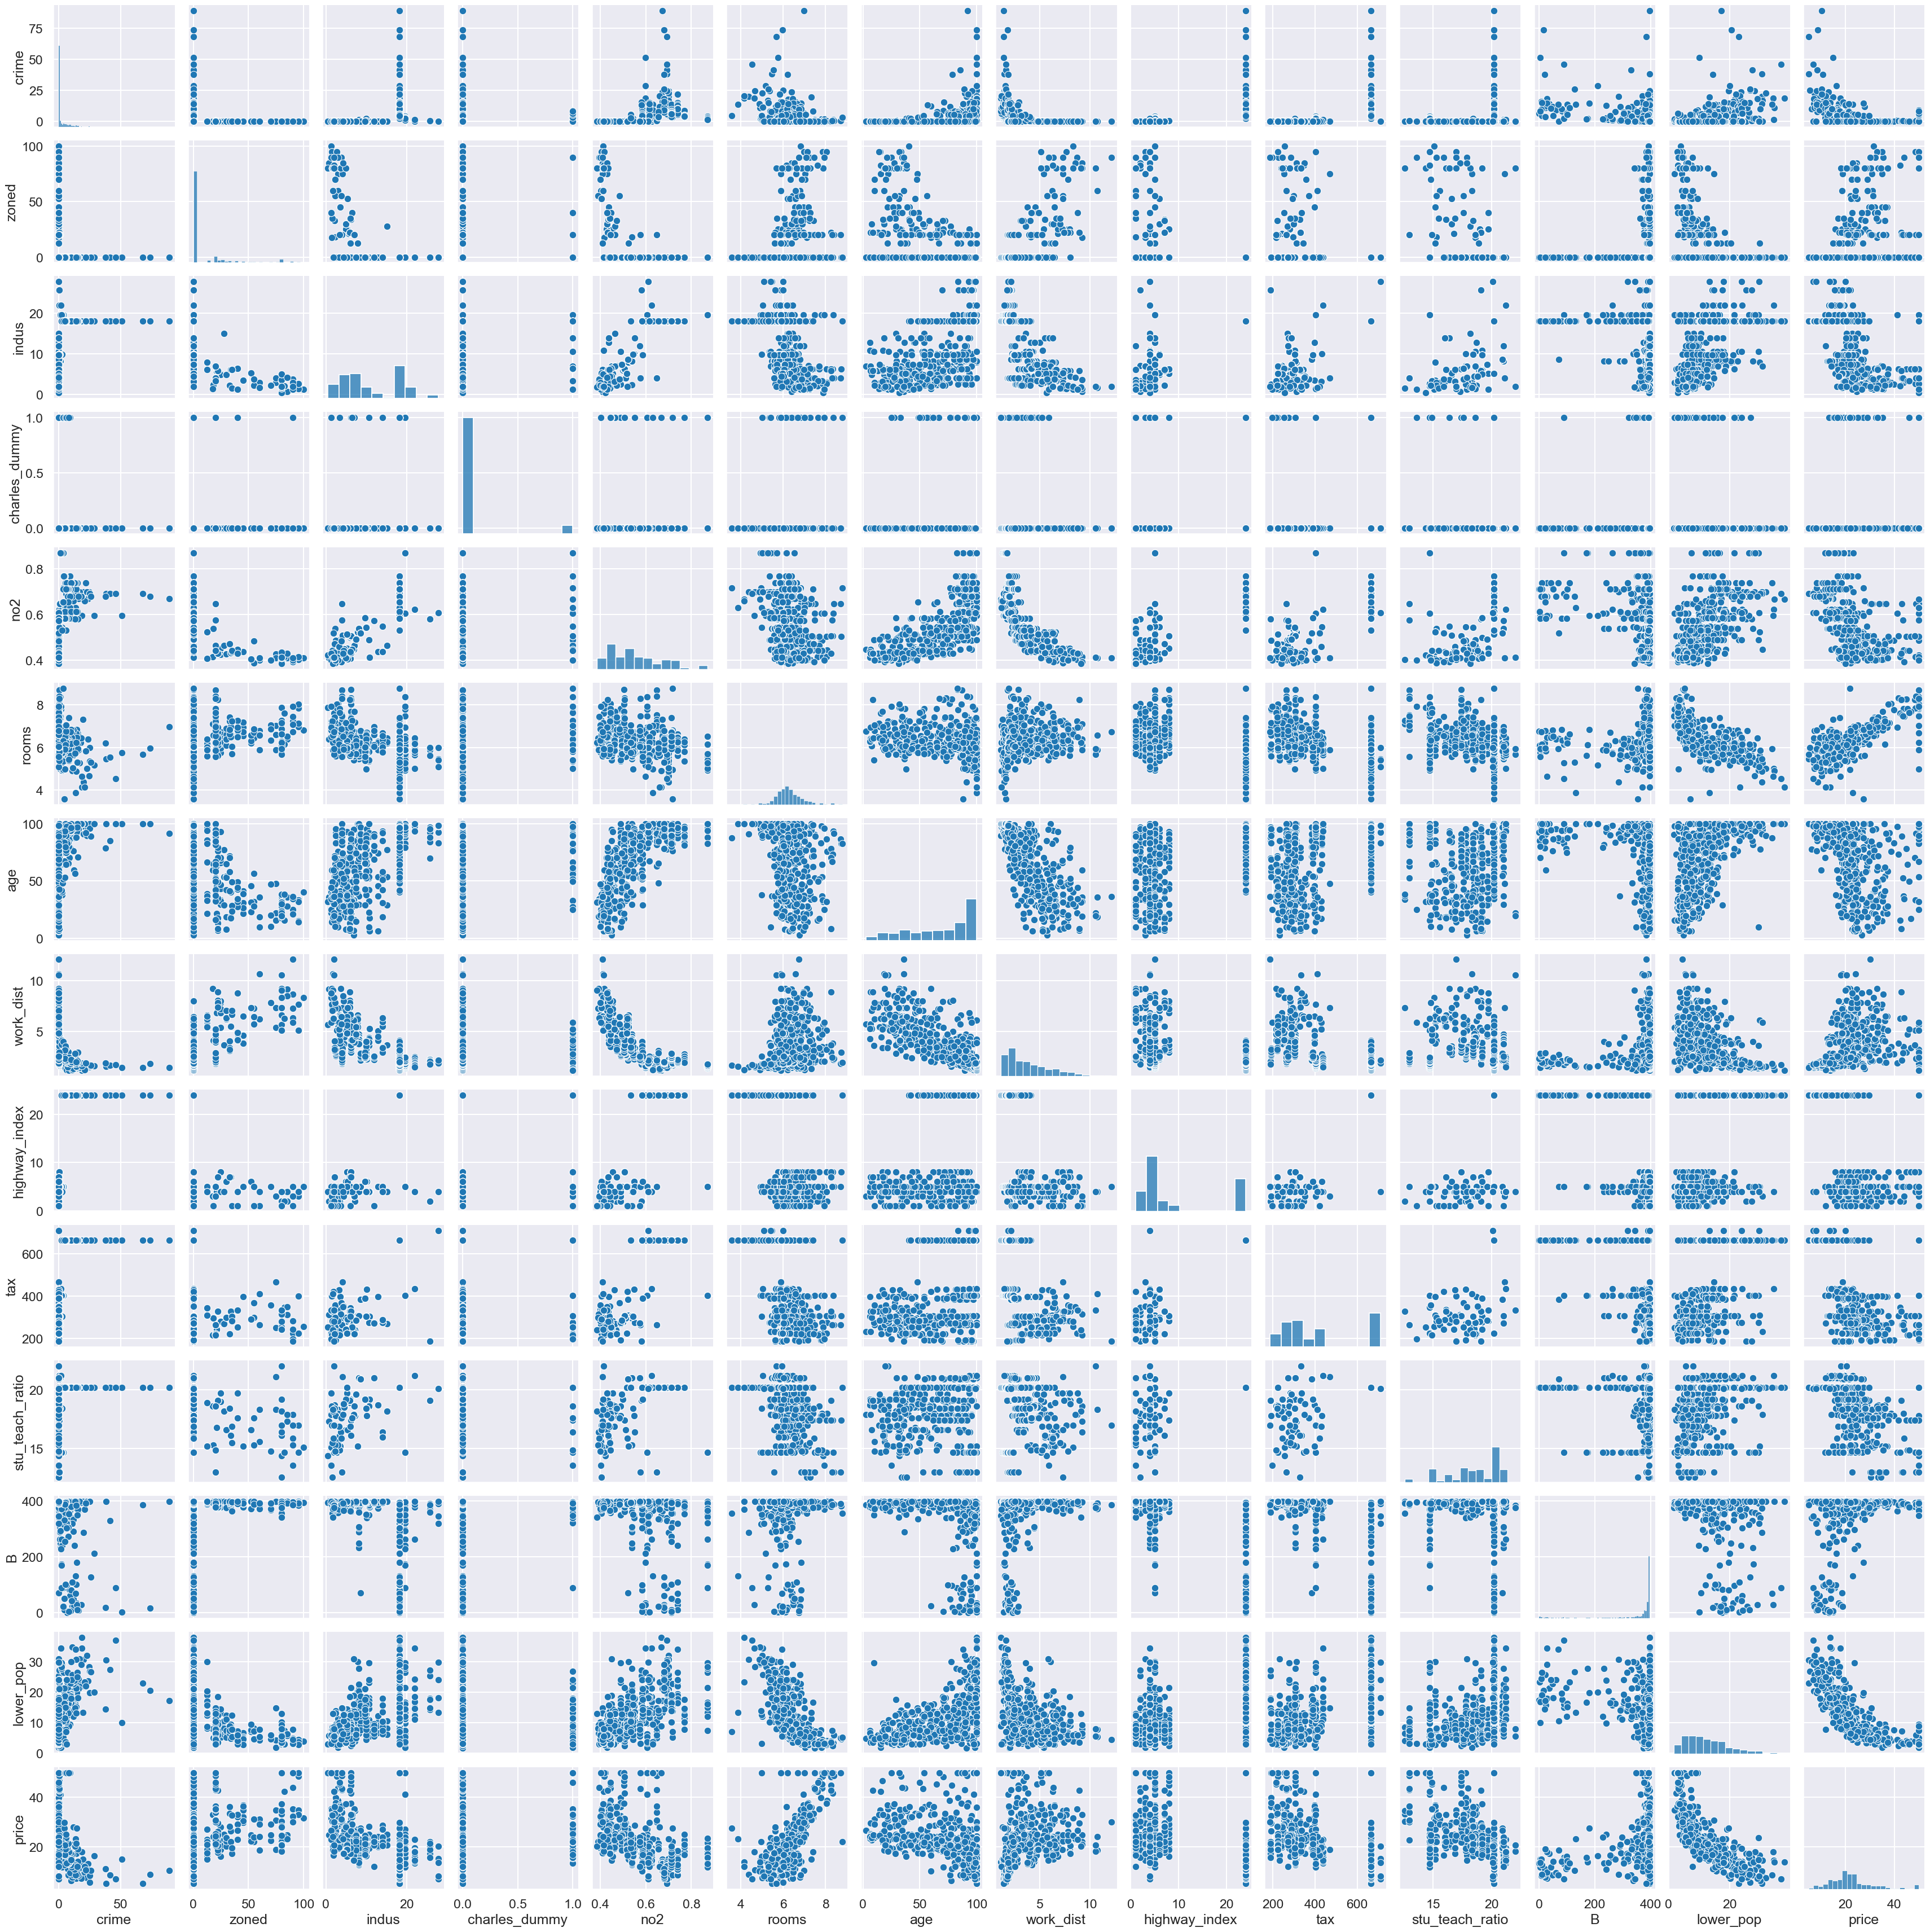

In [33]:
%%time
sns.pairplot(data)

CPU times: user 2min 14s, sys: 21 s, total: 2min 35s
Wall time: 26.4 s


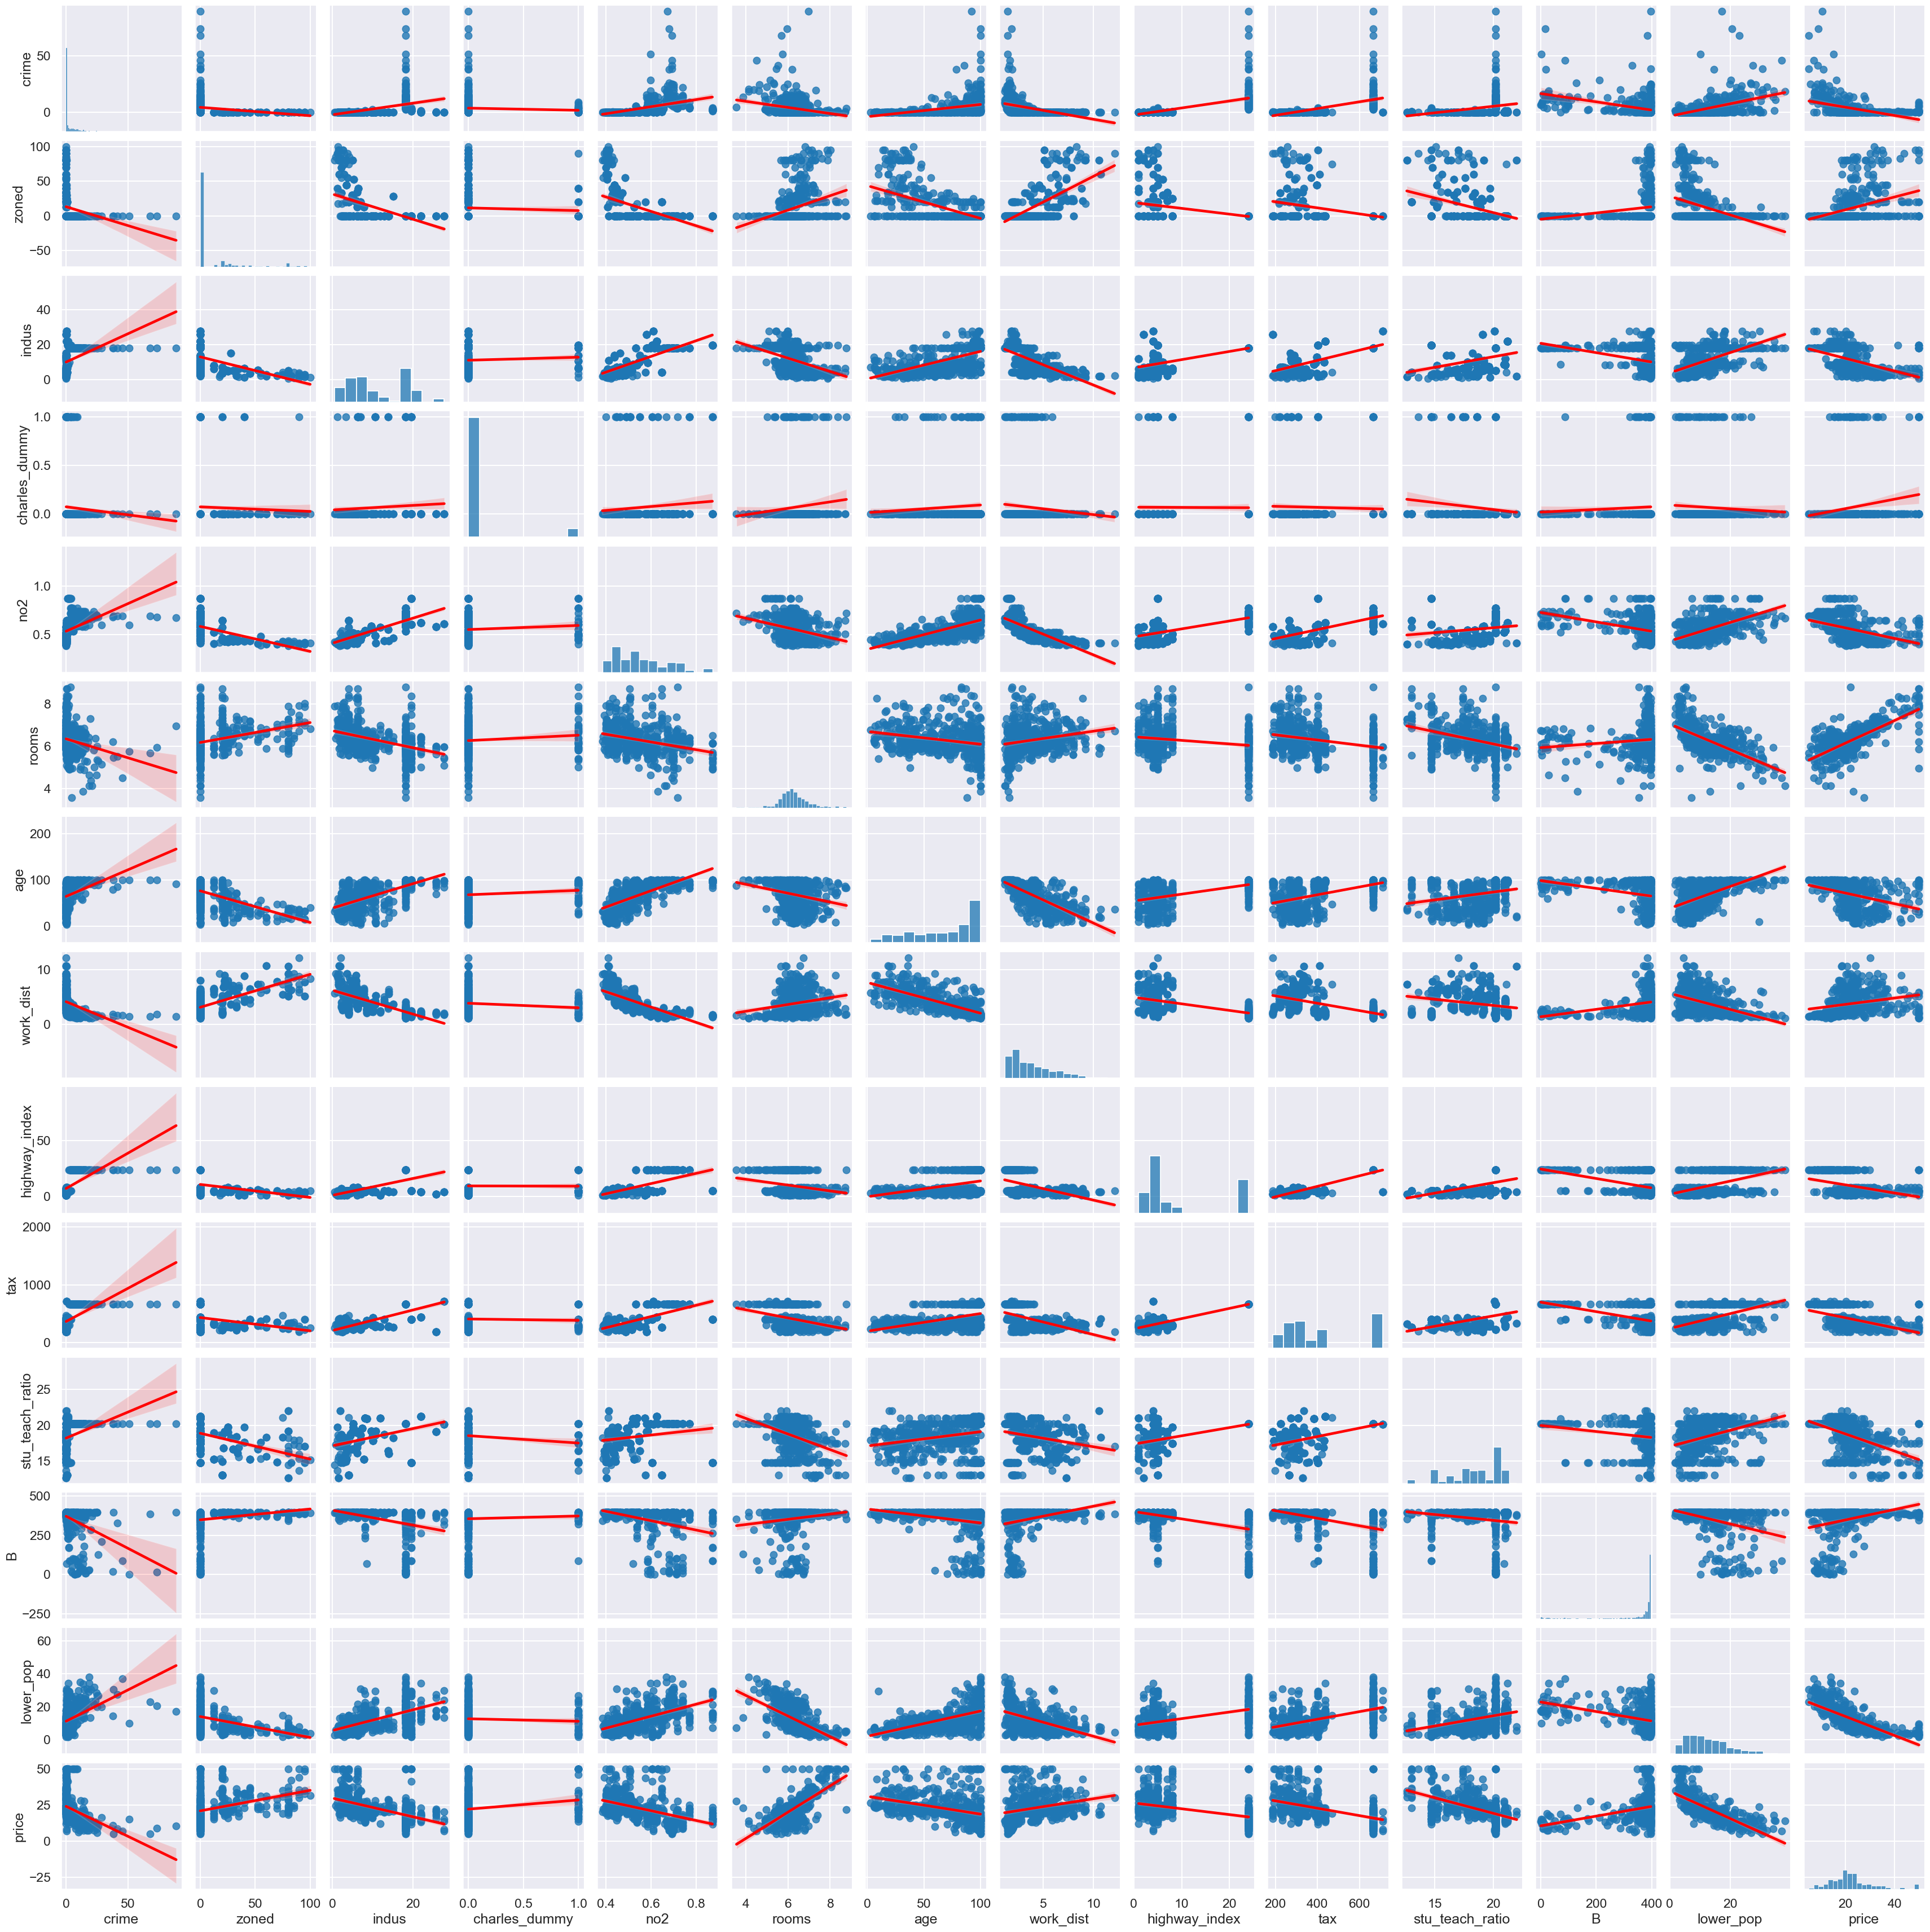

In [34]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})

## Initial Model

- Regression model
- initially will create regression model with all of the features
- then will create a regression model with the features that actually matter in predicting house prices

### Splitting the training and testing data

In [35]:
response = data['price']
features = data.drop('price', axis=1)

In [36]:
response.shape

(506,)

In [37]:
features.shape

(506, 13)

In [38]:
data.shape

(506, 14)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.20, random_state=10)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [40]:
pd.DataFrame(data=lin_reg.coef_, index=X_train.columns, columns=['coef'])

coef
crime            -0.128181
zoned             0.063198
indus            -0.007576
charles_dummy     1.974515
no2             -16.271989
rooms             3.108456
age               0.016292
work_dist        -1.483014
highway_index     0.303988
tax              -0.012082
stu_teach_ratio  -0.820306
B                 0.011419
lower_pop        -0.581626

In [41]:
print('Intercept', lin_reg.intercept_)
print('Training data r-squared: ', round(lin_reg.score(X_train, y_train),3))
print('Test data r-squared: ', round(lin_reg.score(X_test, y_test),3))

Intercept 36.533051382824894
Training data r-squared:  0.75
Test data r-squared:  0.671


## Data Transformations

Transforming the skew that comes from the price outlier

In [42]:
data['price'].skew()

1.1080984082549072

In [43]:
y_log = np.log(data['price'])
y_log.skew()

-0.33032129530987864

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log price with skew -0.33032129530987864')

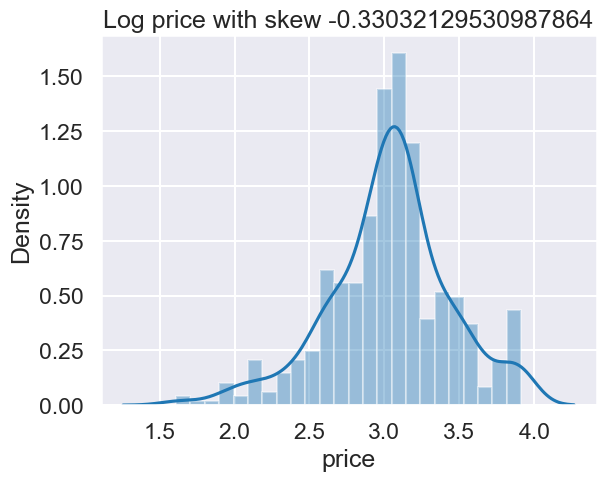

In [44]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')

Showing Differences between price and log price

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


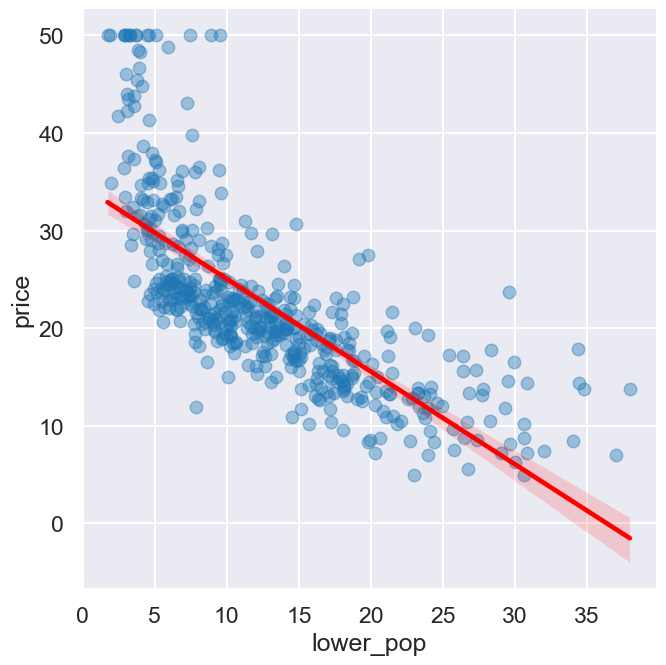

In [45]:
# normal price
sns.lmplot(x='lower_pop', y='price', data=data, size=7, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


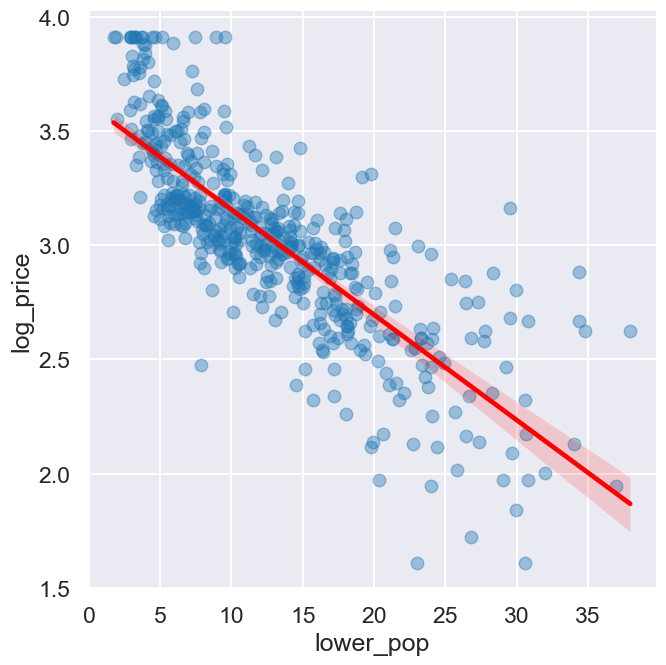

In [46]:
# log price
transformed_features = features.copy()
transformed_features['log_price'] = y_log

sns.lmplot(x='lower_pop', y='log_price', data=transformed_features, size=7, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

In [50]:
response = transformed_features['log_price']
features2 = transformed_features.drop('log_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features2, response, test_size=0.20, random_state=10)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [51]:
print('Intercept', lin_reg.intercept_)
print('Training data r-squared: ', round(lin_reg.score(X_train, y_train),3))
print('Test data r-squared: ', round(lin_reg.score(X_test, y_test),3))

Intercept 4.059943871775209
Training data r-squared:  0.793
Test data r-squared:  0.745


performance on the model traning and testing data has improved!!

In [52]:
pd.DataFrame(data=lin_reg.coef_, index=X_train.columns, columns=['coef'])

coef
crime           -0.010672
zoned            0.001579
indus            0.002030
charles_dummy    0.080331
no2             -0.704068
rooms            0.073404
age              0.000763
work_dist       -0.047633
highway_index    0.014565
tax             -0.000645
stu_teach_ratio -0.034795
B                0.000516
lower_pop       -0.031390

In [56]:
# charles river property premium changed from 1.9 to 0.08, we need to reverse this to show the real premium

premium = round(np.e**0.080331 * 1000,2)

print('Bostonians are willing to pay ',premium, 'more to live on the river')

Bostonians are willing to pay  1083.65 more to live on the river


## p values and evaluating coefficients
    - using statsmodels to return the same models, but give us more information

In [58]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# parameters
results.params

const              4.059944
crime             -0.010672
zoned              0.001579
indus              0.002030
charles_dummy      0.080331
no2               -0.704068
rooms              0.073404
age                0.000763
work_dist         -0.047633
highway_index      0.014565
tax               -0.000645
stu_teach_ratio   -0.034795
B                  0.000516
lower_pop         -0.031390
dtype: float64

In [59]:
# p-values
results.pvalues

const              1.188124e-52
crime              1.753774e-14
zoned              8.607727e-03
indus              4.445368e-01
charles_dummy      3.824015e-02
no2                2.729624e-05
rooms              1.089112e-04
age                2.091731e-01
work_dist          1.812912e-07
highway_index      3.746363e-07
tax                5.145680e-05
stu_teach_ratio    7.549821e-09
B                  6.326839e-06
lower_pop          3.105305e-37
dtype: float64

In [62]:
pd.DataFrame({'coef': results.params, 'p_values': round(results.pvalues,3)})

coef  p_values
const            4.059944     0.000
crime           -0.010672     0.000
zoned            0.001579     0.009
indus            0.002030     0.445
charles_dummy    0.080331     0.038
no2             -0.704068     0.000
rooms            0.073404     0.000
age              0.000763     0.209
work_dist       -0.047633     0.000
highway_index    0.014565     0.000
tax             -0.000645     0.000
stu_teach_ratio -0.034795     0.000
B                0.000516     0.000
lower_pop       -0.031390     0.000

- features indus and age are both not significant because p_values are above 0.05
- does not mean they would improve the model if removed...lets keep looking

## Multicollinearity

- VIF (Variance inflation Factor)
    - measure of collinearity among features within miltivariable regression
$$ TAX = \alpha _0 + \alpha _1 rooms + \alpha _2 no2 + ... + \alpha _{12}lower_pop $$
$$ VIF_{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [65]:
# variance_inflation_factor(exog, exog_idx)

variance_inflation_factor(exog = X_incl_const.values, exog_idx=1)

1.7145250443932485

In [76]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
vif = pd.DataFrame({'coef_name': X_incl_const.columns, 'vif':vif})
vif

coef_name         vif
0             const  597.548713
1             crime    1.714525
2             zoned    2.332822
3             indus    3.943449
4     charles_dummy    1.078813
5               no2    4.410321
6             rooms    1.840405
7               age    3.326766
8         work_dist    4.222923
9     highway_index    7.314300
10              tax    8.508856
11  stu_teach_ratio    1.839912
12                B    1.338671
13        lower_pop    2.812544

All VIF scores are below 10, so none of them are an issue for this instance

## Model Simplication and Baysian Information Criterion (BIC)
- Remember, lower is better

In [78]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)


model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p_values': round(results.pvalues,3)})

print('BIC is: ', results.bic)
print('R-Squared is: ', results.rsquared)

BIC is:  -139.74997769478875
R-Squared is:  0.7930234826697582


In [79]:
# reduced model #1 excluding indus

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['indus'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p_values': round(results.pvalues,3)})

print('BIC is: ', results.bic)
print('R-Squared is: ', results.rsquared)

BIC is:  -145.1450885559114
R-Squared is:  0.7927126289415162


In [82]:
# reduced model #2 excluding indus

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['indus','age'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus_age = pd.DataFrame({'coef': results.params, 'p_values': round(results.pvalues,3)})

print('BIC is: ', results.bic)
print('R-Squared is: ', results.rsquared)

BIC is:  -149.49934294224678
R-Squared is:  0.7918657661852815


Removed Age and Indus from the features and we have a better BIC and R-Squared is ultimately unchanged

In [83]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames, axis=1)

coef  p_values      coef  p_values      coef  p_values
const            4.059944     0.000  4.056231     0.000  4.035922     0.000
crime           -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
zoned            0.001579     0.009  0.001551     0.010  0.001461     0.014
indus            0.002030     0.445       NaN       NaN       NaN       NaN
charles_dummy    0.080331     0.038  0.082795     0.032  0.086449     0.025
no2             -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
rooms            0.073404     0.000  0.071739     0.000  0.076133     0.000
age              0.000763     0.209  0.000766     0.207       NaN       NaN
work_dist       -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
highway_index    0.014565     0.000  0.014014     0.000  0.013743     0.000
tax             -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
stu_teach_ratio -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B                0.000516     0.000  0.000511     0.000  0.000518     0.000
lower_pop       -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

coefficient estimates are constant even after removing indus and age, good news

## Residuals and Residual Plots

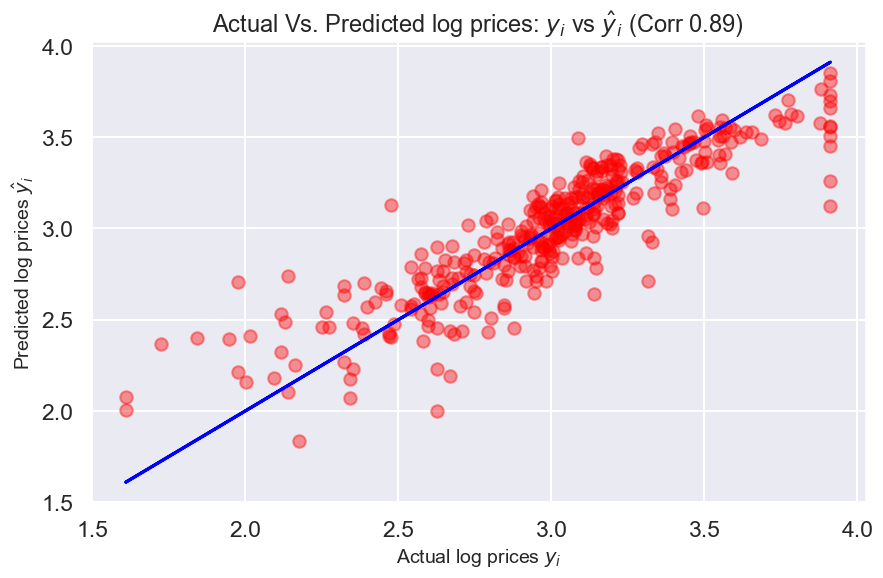

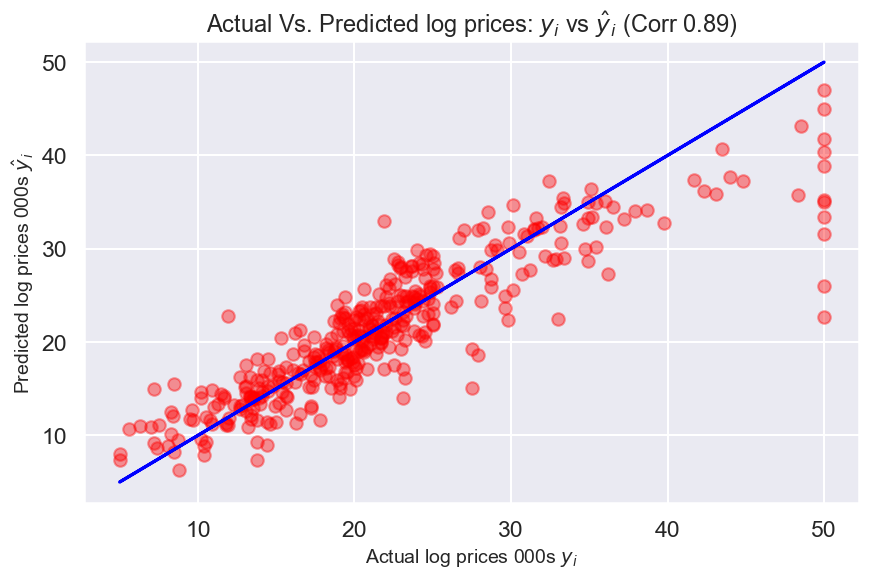

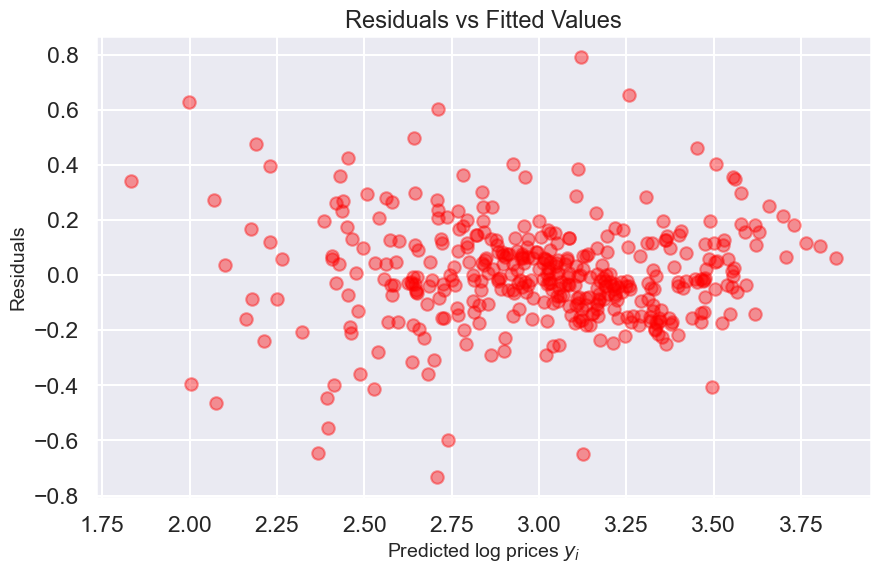

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


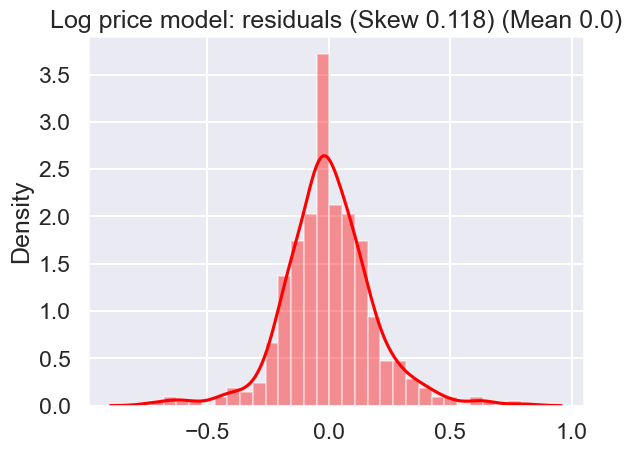

In [124]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
response = transformed_features['log_price']
features = transformed_features.drop(['log_price', 'indus', 'age'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.20, random_state=10)

# using stats models
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of actual vs. predicted prices
corr = round(y_train.corr(results.fittedvalues),2)
corr
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, color='red', alpha=0.4)
plt.plot(y_train, y_train, color='blue')
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual Vs. Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# Actual Vs. Predicted log prices

plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='red', alpha=0.4)
plt.plot(np.e**y_train, np.e**y_train, color='blue')
plt.xlabel('Actual log prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted log prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual Vs. Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# residuals vs predicted values

plt.figure(figsize=(10,6))
plt.scatter(x=results.fittedvalues, y=results.resid, color='red', alpha=0.4)
# plt.plot(y_train, y_train, color='blue')
plt.xlabel('Predicted log prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Distribution of Residuals (log prices) - checking for normality

resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='red')
plt.title(f'Log price model: residuals (Skew {resid_skew}) (Mean {resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquarred = round(results.rsquared,3)

### Compare against original data

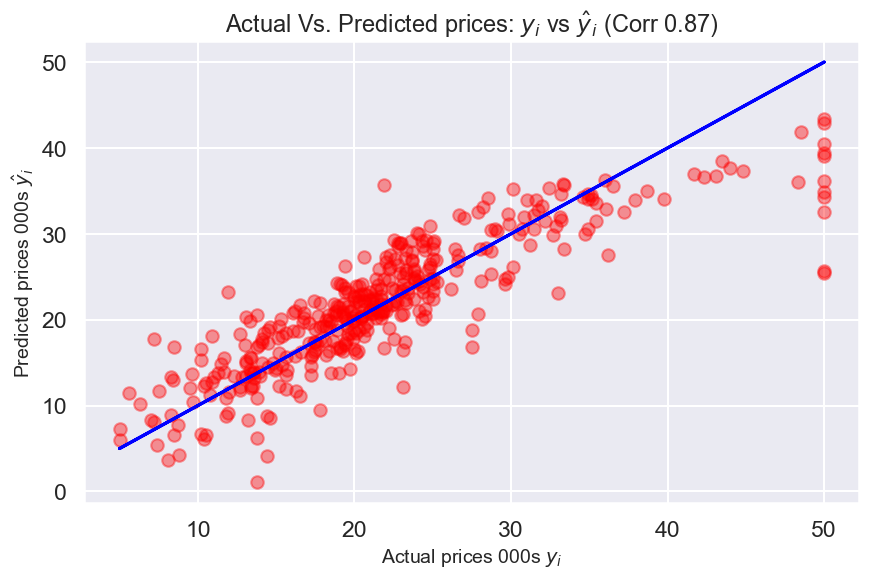

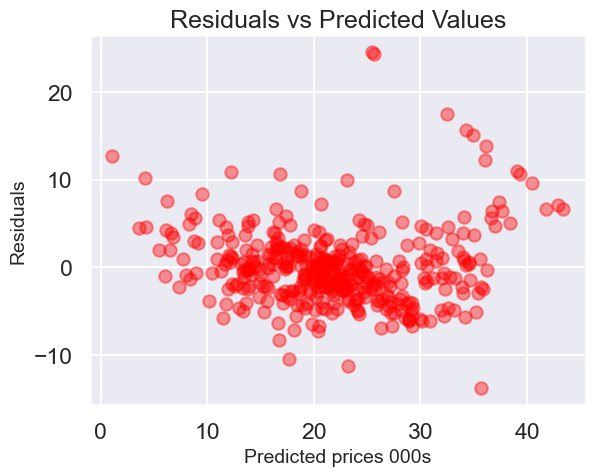

/Users/alexmichel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


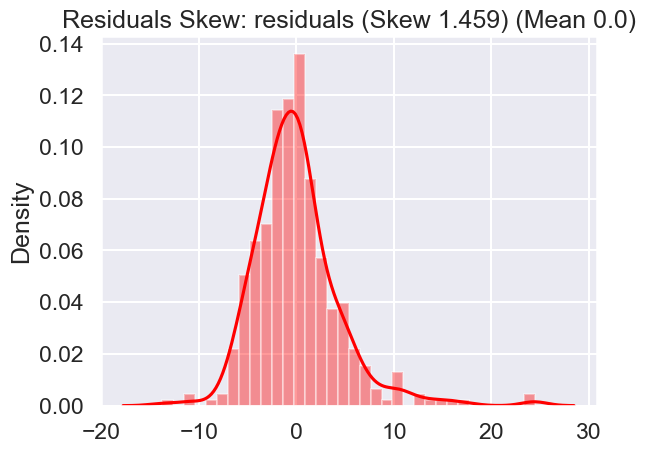

In [125]:
# Original model: normal prices and all features
response = data['price']
features = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.20, random_state=10)

# using stats models
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of actual vs. predicted prices
corr = round(y_train.corr(results.fittedvalues),2)
corr
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=results.fittedvalues, color='red', alpha=0.4)
plt.plot(y_train, y_train, color='blue')
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual Vs. Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='red', alpha=0.4)
plt.xlabel('Predicted prices 000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted Values')
plt.show()


#Residual Distribution Chart

resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='red')
plt.title(f'Residuals Skew: residuals (Skew {resid_skew}) (Mean {resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
original_mse = round(results.mse_resid,3)
original_rsquarred = round(results.rsquared,3)

Distribution is a bit skewed in the original data

In [129]:
pd.DataFrame({'R-Squared':[reduced_log_rsquarred,original_rsquarred], 'MSE':[reduced_log_mse,original_mse], 'RMSE':np.sqrt([reduced_log_mse,original_mse])},
              index=['Reduced Log Model', 'Full Normal Price Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295

The reduced log model has a lower R squared and MSE